In [1]:
import numpy as np 
import pandas as pd 


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import tensorflow as tf

In [4]:
data = pd.read_csv('creditcard.csv')

In [5]:
pd.options.display.max_columns = None

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
data.shape

(284807, 31)

In [9]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [14]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
data = data.drop(['Time'],axis=1)

In [16]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [17]:
data.shape

(284807, 30)

In [18]:
data.duplicated().any()

True

In [19]:
data = data.drop_duplicates()

In [20]:
data.shape

(275663, 30)

In [21]:
data['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [22]:
import seaborn as sns

<Axes: ylabel='count'>

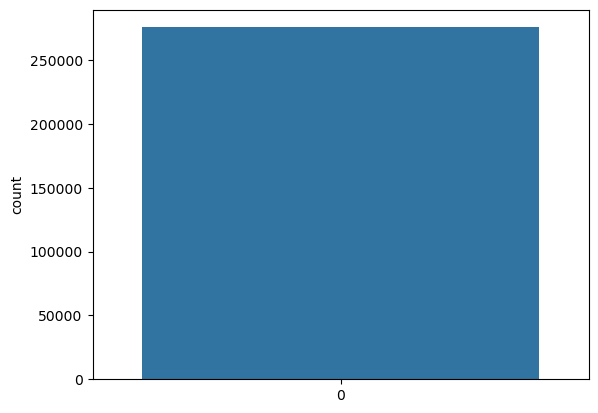

In [23]:
sns.countplot(data['Class'])

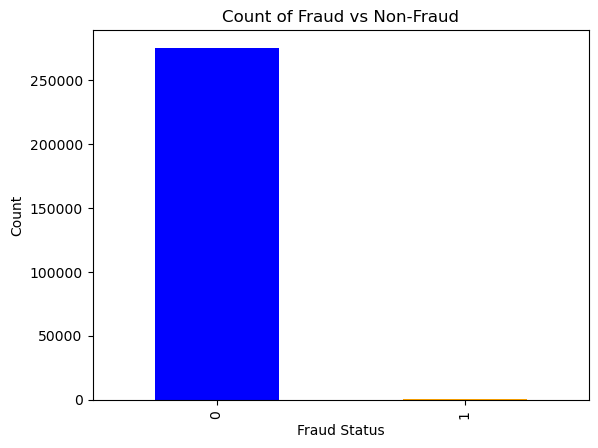

In [25]:
data['Class'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Count of Fraud vs Non-Fraud')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()


In [26]:
X = data.drop('Class',axis=1)
y = data['Class']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [28]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [29]:
normal.shape

(275190, 30)

In [30]:
fraud.shape

(473, 30)

In [31]:
# Load the dataset (replace this with your dataset)
df = pd.read_csv('creditcard.csv')

# Drop irrelevant columns (if any)
X = df.drop('Class', axis=1)  # Features (replace 'Class' with the fraud column in your dataset)
y = df['Class']  # Target (0 = Legitimate, 1 = Fraud)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)


In [33]:
pd.Series(y_resampled).value_counts()


Class
0    199008
1    199008
Name: count, dtype: int64

In [34]:
# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
print("Performance after applying SMOTE:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Performance after applying SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.39      0.82      0.53       136

    accuracy                           1.00     85443
   macro avg       0.70      0.91      0.76     85443
weighted avg       1.00      1.00      1.00     85443

[[85135   172]
 [   25   111]]


In [35]:
accuracy_score(y_test,y_pred)

0.9976943693456456

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score
precision_score(y_test,y_pred)

0.392226148409894

In [39]:
recall_score(y_test,y_pred)

0.8161764705882353

In [40]:
f1_score(y_test,y_pred)

0.5298329355608592

In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_resampled, y_resampled)


LogisticRegression()

In [47]:
y_pred1 = log.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9732453214423651

In [48]:
# Evaluate the model on the test set
y_pred = log.predict(X_test_scaled)
print("Performance after applying SMOTE:")
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))


Performance after applying SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443

[[83030  2277]
 [    9   127]]


In [49]:
from sklearn.svm import SVC

In [50]:
svm = SVC()

In [51]:
# Fit the model to the training data
svm.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred_svm = svm.predict(X_test_scaled)
print("Performance after applying SMOTE:")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


Performance after applying SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.09      0.92      0.16       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.58     85443
weighted avg       1.00      0.98      0.99     85443

[[84002  1305]
 [   11   125]]


In [52]:
accuracy_score(y_test,y_pred_svm)

0.9845979190805566

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.88      0.86       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443

[[85286    21]
 [   17   119]]


In [56]:
accuracy_score(y_test,y_pred_rf)

0.9995552590615966

In [57]:
# CNN Model (more appropriate for tabular data: use fully connected layers)
CNN_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [58]:
# Compile the model
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# Train the model
CNN_model.fit(X_resampled, y_resampled, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9837 - loss: 0.0482 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 2/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 3/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 4/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9993 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 9.2132e-04
Epoch 5/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9994 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 6.8297e-04
Epoch 6/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 7.2150e-04
Epoch 7/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.6277e-04
Epoch 8/30
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 

In [60]:
# Predict on test data
y_pred = CNN_model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [61]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.9f}')

Accuracy: 0.999309481


In [62]:
print("CNN Performance:")
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

CNN Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.78      0.79      0.78       136

    accuracy                           1.00     85443
   macro avg       0.89      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443

[[85277    30]
 [   29   107]]


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

In [68]:

# SMOTE-ENN Resampling
smote_enn = SMOTE(random_state=42)
# Reshape the resampled data to 3D: [samples, timesteps, features]
# For LSTM, let's use one timestep and all features in each sample
X_resampled = np.expand_dims(X_resampled, axis=-1)  # Adds a dimension at the end for features
X_test = np.expand_dims(X_test, axis=-1)

In [69]:
# Define the LSTM model with corrected input shape
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape[1], input_shape[2])))  # Using the reshaped input with [samples, timesteps, features]
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [70]:
# Now create the model with the new input shape
lstm_model = create_lstm_model(X_resampled.shape)

In [71]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [72]:
# Train the LSTM model
lstm_model.fit(
    X_resampled, y_resampled,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/20
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 165s 16ms/step - accuracy: 0.9478 - loss: 0.1557 - val_accuracy: 0.9856 - val_loss: 0.0460
Epoch 2/20
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 127s 13ms/step - accuracy: 0.9876 - loss: 0.0351 - val_accuracy: 0.9963 - val_loss: 0.0135
Epoch 3/20
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 128s 13ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9983 - val_loss: 0.0069
Epoch 4/20
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 131s 13ms/step - accuracy: 0.9969 - loss: 0.0112 - val_accuracy: 0.9962 - val_loss: 0.0117
Epoch 5/20
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 130s 13ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 6/20
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 131s 13ms/step - accuracy: 0.9979 - loss: 0.0077 - val_accuracy: 0.9959 - val_loss: 0.0134
Epoch 7/20
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 128s 13ms/step - accuracy: 0.9982 - loss: 0.0067 - val_accuracy: 0.9999 - val_loss: 9.7477e-04
Epoch 8/20
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 128s 13ms/step - accura

In [74]:
# Model Evaluation
y_pred_lstm = lstm_model.predict(X_test_scaled)
y_pred_lstm = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step


In [76]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_lstm)
# roc_auc = roc_auc_score(y_test, y_pred_lstm)
report = classification_report(y_test, y_pred_lstm, target_names=['Legit', 'Fraud'])

print("Model Accuracy:", accuracy)
# print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", report)

Model Accuracy: 0.9991222218320986
Classification Report:
               precision    recall  f1-score   support

       Legit       1.00      1.00      1.00     85307
       Fraud       0.68      0.86      0.76       136

    accuracy                           1.00     85443
   macro avg       0.84      0.93      0.88     85443
weighted avg       1.00      1.00      1.00     85443

